In [1]:
import numpy as np
from matplotlib import pyplot as plt

from matplotlib.lines import Line2D

In [2]:
results_base_dir = "results-averages/"
# results_base_dir = "results_randseed_geo_only/"

In [3]:
# 

case_studies = [
    "1h-none-noSUSD",
    "1h-expensive-relaxedSUSD",
    "1h-expensive-tightSUSD",
    "2h-none-noSUSD",
    "2h-expensive-relaxedSUSD",
    "2h-expensive-tightSUSD",
    "3h-none-noSUSD",
    "3h-expensive-relaxedSUSD",
    "3h-expensive-tightSUSD",
    "4h-none-noSUSD",
    "4h-expensive-relaxedSUSD",
    "4h-expensive-tightSUSD",
    "5h-none-noSUSD",
    "5h-expensive-relaxedSUSD",
    "5h-expensive-tightSUSD",
    "geographical-none-noSUSD",
    "geographical-expensive-relaxedSUSD",
    "geographical-expensive-tightSUSD",
]

# case_studies = [
#     "1h-none-noSUSD",
#     "1h-cheap-relaxedSUSD",
#     "1h-cheap-tightSUSD",
#     "1h-expensive-relaxedSUSD",
#     "1h-expensive-tightSUSD",
#     "2h-none-noSUSD",
#     "2h-cheap-relaxedSUSD",
#     "2h-cheap-tightSUSD",
#     "2h-expensive-relaxedSUSD",
#     "2h-expensive-tightSUSD",
#     "3h-none-noSUSD",
#     "3h-cheap-relaxedSUSD",
#     "3h-cheap-tightSUSD",
#     "3h-expensive-relaxedSUSD",
#     "3h-expensive-tightSUSD",
#     "4h-none-noSUSD",
#     "4h-cheap-relaxedSUSD",
#     "4h-cheap-tightSUSD",
#     "4h-expensive-relaxedSUSD",
#     "4h-expensive-tightSUSD",
#     "5h-none-noSUSD",
#     "5h-cheap-relaxedSUSD",
#     "5h-cheap-tightSUSD",
#     "5h-expensive-relaxedSUSD",
#     "5h-expensive-tightSUSD",
#     "geographical-none-noSUSD",
#     "geographical-cheap-relaxedSUSD",
#     "geographical-cheap-tightSUSD",
#     "geographical-expensive-relaxedSUSD",
#     "geographical-expensive-tightSUSD",
# ]


# case_studies = [
#     "geographical-none-noSUSD",
#     "geographical-cheap-relaxedSUSD",
#     "geographical-cheap-tightSUSD",
#     "geographical-expensive-relaxedSUSD",
#     "geographical-expensive-tightSUSD",
# ]

In [4]:
total_costs = []
total_costs_nl = []
op_costs_nl = []
total_costs_non_nl = []
op_costs_non_nl = []

for case_study in case_studies:
    
    ##############
#     if 'medium' in case_study:
#         continue
    
    total_costs_temp = []
    total_costs_nl_temp = []
    with open(results_base_dir + case_study + "/" + "objective_value.txt", 'r') as file:
        for line in file:
            line_split = line.split(';')

            total_costs_temp.append(float(line_split[0]))
            total_costs_nl_temp.append(float(line_split[1]))
#             op_costs_nl.append(float(line_split[2]))
#             total_costs_non_nl.append(float(line_split[3]))
#             op_costs_non_nl.append(float(line_split[4]))

        total_costs.append(total_costs_temp)
        total_costs_nl.append(total_costs_nl_temp)


# total_costs

In [5]:
# total_costs

In [6]:
[len(x) for x in total_costs]

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [7]:
total_costs_np_array = np.array(total_costs)

In [8]:
total_costs_means = np.mean(total_costs_np_array, axis=1)
total_costs_stds = np.std(total_costs_np_array, axis=1)

In [9]:
total_costs_nl_np_array = np.array(total_costs_nl)

In [10]:
total_costs_nl_means = np.mean(total_costs_nl_np_array, axis=1)
total_costs_nl_stds = np.std(total_costs_nl_np_array, axis=1)

1

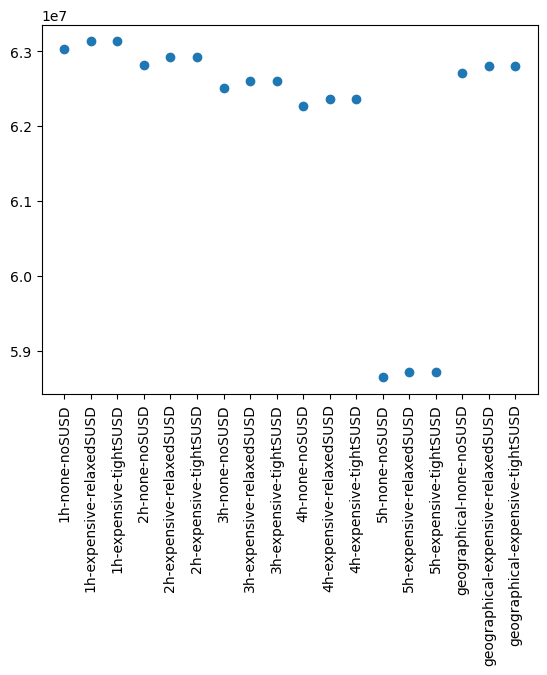

In [11]:
plt.scatter(case_studies, total_costs_means)
plt.xticks(rotation=90)
1

1

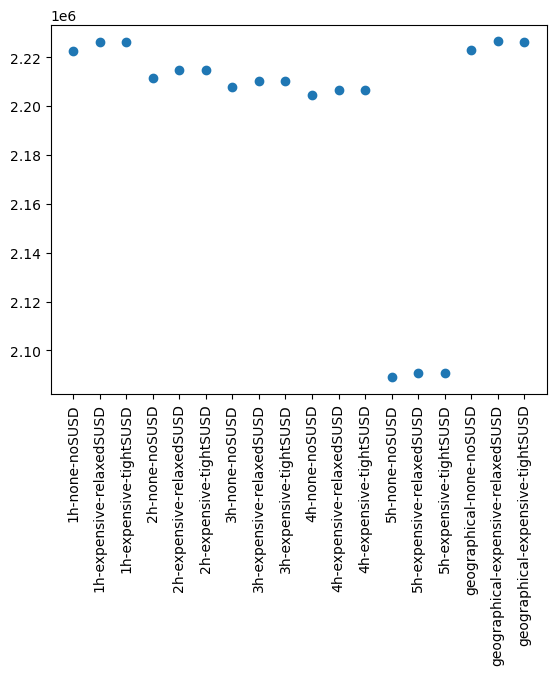

In [12]:
plt.scatter(case_studies, total_costs_nl_means)
plt.xticks(rotation=90)
1

1

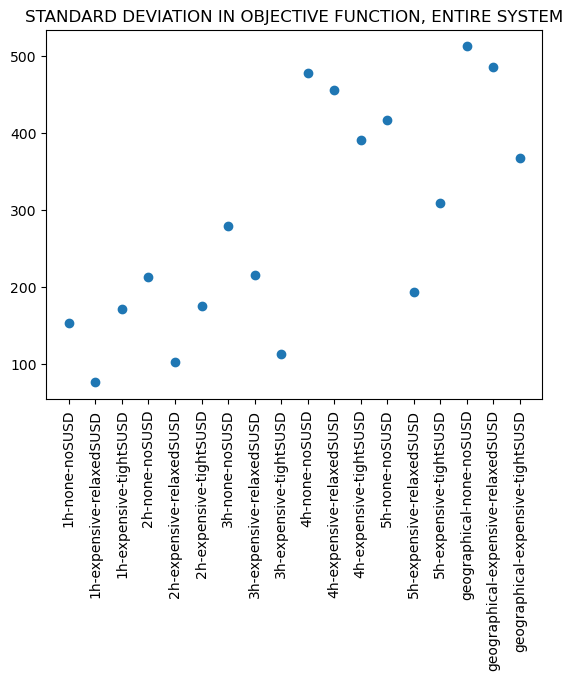

In [13]:
plt.scatter(case_studies, total_costs_stds)
plt.xticks(rotation=90)
plt.title("STANDARD DEVIATION IN OBJECTIVE FUNCTION, ENTIRE SYSTEM")
1

1

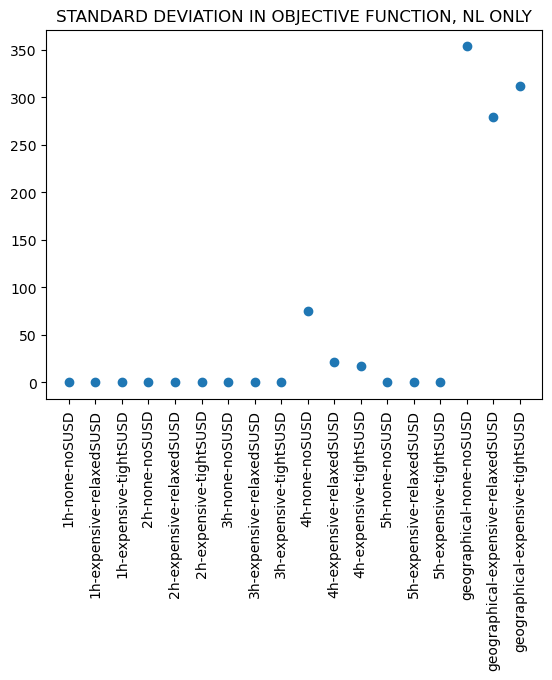

In [14]:
plt.scatter(case_studies, total_costs_nl_stds)
plt.xticks(rotation=90)
plt.title("STANDARD DEVIATION IN OBJECTIVE FUNCTION, NL ONLY")
1

In [15]:
# economic_cases = ['none', 'cheap', 'expensive']
economic_cases = ['none', 'expensive']

temporal_resolutions = ['1h', '2h', '3h', '4h', '5h', 'geographical']
constraint_cases = ['none', 'tight', 'relaxed']

colours = ['red', 'blue', 'green', 'brown', 'pink', 'orange']

def plot_cases(y_data, title, economic_case='expensive', is_NL_only=False):
    
    plt.rcParams.update({'font.size': 10})
    
    fig, ax = plt.subplots()
    
    all_points = []
    
    all_points_with_geo = []

    for (temporal_res, colour) in zip(temporal_resolutions, colours):
        noSUSD_index = case_studies.index(f"{temporal_res}-none-noSUSD")
#         tight_index = case_studies.index(f"{temporal_res}-cheap-tightSUSD")
#         relaxed_index = case_studies.index(f"{temporal_res}-cheap-relaxedSUSD")
        
        tight_index_exp = case_studies.index(f"{temporal_res}-expensive-tightSUSD")
        relaxed_index_exp = case_studies.index(f"{temporal_res}-expensive-relaxedSUSD")

        ax.scatter(case_studies[noSUSD_index].replace('noSUSD', 'none'), y_data[noSUSD_index], color=colour, marker="o", s=80, edgecolors='black', linewidths=0.8, alpha=0.7)
        ax.scatter(case_studies[tight_index].replace('tightSUSD', 'full'), y_data[tight_index], color=colour, marker="v", s=80, edgecolors='black', linewidths=0.8, alpha=0.7)
        ax.scatter(case_studies[relaxed_index].replace('relaxedSUSD', 'compact'), y_data[relaxed_index], color=colour, marker="P", s=80, edgecolors='black', linewidths=0.8, alpha=0.7)
        
        ax.scatter(case_studies[tight_index_exp].replace('tightSUSD', 'full'), y_data[tight_index_exp], color=colour, marker="^", s=80, edgecolors='black', linewidths=0.8, alpha=0.7)
        ax.scatter(case_studies[relaxed_index_exp].replace('relaxedSUSD', 'compact'), y_data[relaxed_index_exp], color=colour, marker="X", s=80, edgecolors='black', linewidths=0.8, alpha=0.7)
        

    plt.rcParams.update({'font.size': 9})

        
    legend1 = ax.legend(handles=[
        Line2D([0], [0], marker='s', color='w', label='1h', markerfacecolor='red', markersize=8),
        Line2D([0], [0], marker='s', color='w', label='2h', markerfacecolor='blue', markersize=8),
        Line2D([0], [0], marker='s', color='w', label='3h', markerfacecolor='green', markersize=8),
        Line2D([0], [0], marker='s', color='w', label='4h', markerfacecolor='brown', markersize=8),
        Line2D([0], [0], marker='s', color='w', label='5h', markerfacecolor='pink', markersize=8),
        Line2D([0], [0], marker='s', color='w', label='Geographical', markerfacecolor='orange', markersize=8),
    ], title='Temporal resolution', loc='upper left')

    ax.add_artist(legend1)
    
    plt.xticks(rotation=90)
    
    
    legend2 = ax.legend(handles=[
        Line2D([0], [0], marker='o', color='w', label='No SU/SD costs', markerfacecolor='black', markersize=8),
        Line2D([0], [0], marker='X', color='w', label='Compact constraints, expensive', markerfacecolor='black', markersize=8),
        Line2D([0], [0], marker='^', color='w', label='Full constraints, expensive', markerfacecolor='black', markersize=8),
        Line2D([0], [0], marker='P', color='w', label='Compact constraints, cheap', markerfacecolor='black', markersize=8),
        Line2D([0], [0], marker='v', color='w', label='Full constraints, cheap', markerfacecolor='black', markersize=8),
    ], title='SU/SD constraints, costs', loc='center left')
    
    ax.add_artist(legend2)
    
    plt.rcParams.update({'font.size': 10})
    
    plt.xticks([])  # Hides tick labels
    
    plt.title(title)
#     plt.xlabel("Computation time [s]")
    plt.ylabel("Standard deviation")

    plt.tight_layout()
    plt.show()

NameError: name 'tight_index' is not defined

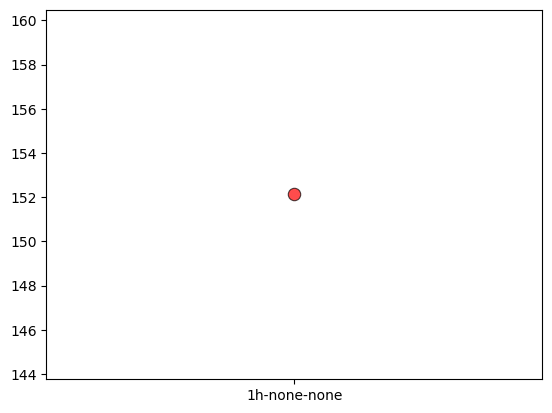

In [16]:
plot_cases(total_costs_stds, "Standard deviations in objective function value for the entire system")

In [ ]:
plot_cases(total_costs_nl_stds, "Standard deviations in objective function value for the Netherlands")

In [ ]:
diff_total_tight_expensive = []
diff_total_relaxed_expensive = []

diff_total_tight_cheap = []
diff_total_relaxed_cheap = []

diff_nl_tight_expensive = []
diff_nl_relaxed_expensive = []

diff_nl_tight_cheap = []
diff_nl_relaxed_cheap = []

diff_total_tight_medium = []
diff_total_relaxed_medium = []

diff_nl_tight_medium = []
diff_nl_relaxed_medium = []

In [ ]:
for temporal_res in temporal_resolutions:
    noSUSD_index = case_studies.index(f"{temporal_res}-none-noSUSD")
    tight_index = case_studies.index(f"{temporal_res}-expensive-tightSUSD")
    relaxed_index = case_studies.index(f"{temporal_res}-expensive-relaxedSUSD")
    
    diff_total_tight_expensive.append(100 * (total_costs_means[tight_index] - total_costs_means[noSUSD_index]) / total_costs_means[noSUSD_index])
    diff_total_relaxed_expensive.append(100 * (total_costs_means[relaxed_index] - total_costs_means[noSUSD_index]) / total_costs_means[noSUSD_index])
    
    diff_nl_tight_expensive.append(100 * (total_costs_nl_means[tight_index] - total_costs_nl_means[noSUSD_index]) / total_costs_nl_means[noSUSD_index])
    diff_nl_relaxed_expensive.append(100 * (total_costs_nl_means[relaxed_index] - total_costs_nl_means[noSUSD_index]) / total_costs_nl_means[noSUSD_index])
    
#     noSUSD_index = case_studies.index(f"{temporal_res}-none-noSUSD")
#     tight_index = case_studies.index(f"{temporal_res}-cheap-tightSUSD")
#     relaxed_index = case_studies.index(f"{temporal_res}-cheap-relaxedSUSD")
    
#     diff_total_tight_cheap.append(100 * (total_costs_means[tight_index] - total_costs_means[noSUSD_index]) / total_costs_means[noSUSD_index])
#     diff_total_relaxed_cheap.append(100 * (total_costs_means[relaxed_index] - total_costs_means[noSUSD_index]) / total_costs_means[noSUSD_index])
    
#     diff_nl_tight_cheap.append(100 * (total_costs_nl_means[tight_index] - total_costs_nl_means[noSUSD_index]) / total_costs_nl_means[noSUSD_index])
#     diff_nl_relaxed_cheap.append(100 * (total_costs_nl_means[relaxed_index] - total_costs_nl_means[noSUSD_index]) / total_costs_nl_means[noSUSD_index])
    
    ###############
#     noSUSD_index = case_studies.index(f"{temporal_res}-none-noSUSD")
#     tight_index = case_studies.index(f"{temporal_res}-medium-tightSUSD")
#     relaxed_index = case_studies.index(f"{temporal_res}-medium-relaxedSUSD")
    
#     diff_total_tight_medium.append(100 * (total_costs_means[tight_index] - total_costs_means[noSUSD_index]) / total_costs_means[noSUSD_index])
#     diff_total_relaxed_medium.append(100 * (total_costs_means[relaxed_index] - total_costs_means[noSUSD_index]) / total_costs_means[noSUSD_index])
    
#     diff_nl_tight_medium.append(100 * (total_costs_nl_means[tight_index] - total_costs_nl_means[noSUSD_index]) / total_costs_nl_means[noSUSD_index])
#     diff_nl_relaxed_medium.append(100 * (total_costs_nl_means[relaxed_index] - total_costs_nl_means[noSUSD_index]) / total_costs_nl_means[noSUSD_index])

In [ ]:
plt.scatter(temporal_resolutions, diff_total_tight_expensive)
plt.title("Percentage difference between case without SU/SD and with Tight SU/SD, expensive case, per temporal resolution")

plt.scatter(temporal_resolutions, diff_total_tight_cheap)
# plt.scatter(temporal_resolutions, diff_total_relaxed_expensive)
# plt.scatter(temporal_resolutions, diff_total_relaxed_cheap)

In [ ]:
plt.rcParams.update({'font.size': 10})


plt.plot(temporal_resolutions, diff_nl_tight_expensive, '--.',  label="full expensive")
plt.title("Percentage difference in objective function value for the Netherlands \n between case without SU/SD costs and all other cases")

plt.plot(temporal_resolutions, diff_nl_tight_cheap, '--.', label="full cheap")
plt.plot(temporal_resolutions, diff_nl_relaxed_expensive, '--.', label="compact expensive")
plt.plot(temporal_resolutions, diff_nl_relaxed_cheap, '--.', label="compact cheap")

##################
plt.plot(temporal_resolutions, diff_nl_tight_medium, '--.',  label="full medium")
plt.plot(temporal_resolutions, diff_nl_relaxed_medium, '--.', label="compact medium")
##################


plt.plot(['geographical'], [diff_total_tight_expensive[-1]], 'X', label="full expensive (overall system)")
plt.plot(['geographical'], [diff_total_tight_cheap[-1]], 'X', label="full cheap (overall system)")
plt.plot(['geographical'], [diff_total_tight_medium[-1]], 'X', label="full medium (overall system)")


plt.xlabel('Temporal resolution')
plt.ylabel('Percentage difference [%]')

plt.rcParams.update({'font.size': 8})


plt.legend(loc='lower left')

In [ ]:
plt.rcParams.update({'font.size': 10})

plt.plot(temporal_resolutions, diff_total_tight_expensive, '--.',  label="full expensive")
plt.title("Percentage difference in objective function value for the overall system \n between case without SU/SD costs and all other cases")

plt.plot(temporal_resolutions, diff_total_tight_medium, '--.',  label="full medium")
plt.plot(temporal_resolutions, diff_total_relaxed_medium, '--.', label="compact medium")

plt.plot(temporal_resolutions, diff_total_tight_cheap, '--.', label="full cheap")
plt.plot(temporal_resolutions, diff_total_relaxed_expensive, '--.', label="compact expensive")
plt.plot(temporal_resolutions, diff_total_relaxed_cheap, '--.', label="compact cheap")

plt.xlabel('Temporal resolution')
plt.ylabel('Percentage difference [%]')

plt.rcParams.update({'font.size': 8})

plt.legend()

In [ ]:
plt.plot(temporal_resolutions, diff_nl_tight_expensive, '--o',  label="tight expensive NL")
plt.title("Percentage difference in objective function value for the Netherlands \n between case without SU/SD costs and all other cases")

plt.plot(temporal_resolutions, diff_nl_tight_cheap, '--o', label="tight cheap NL")
plt.plot(temporal_resolutions, diff_nl_relaxed_expensive, '--o', label="relaxed expensive NL")
plt.plot(temporal_resolutions, diff_nl_relaxed_cheap, '--o', label="relaxed cheap NL")



################
plt.plot(temporal_resolutions, diff_total_tight_expensive, '--o',  label="tight expensive overall")
plt.title("Percentage difference in objective function value for the Netherlands \n between case without SU/SD costs and all other cases")

plt.plot(temporal_resolutions, diff_total_tight_cheap, '--o', label="tight cheap overall")
plt.plot(temporal_resolutions, diff_total_relaxed_expensive, '--o', label="relaxed expensive overall")
plt.plot(temporal_resolutions, diff_total_relaxed_cheap, '--o', label="relaxed cheap overall")
########


plt.xlabel('Temporal resolution')
plt.ylabel('Percentage difference [%]')

plt.legend(loc='lower left')

In [ ]:
diff_total_tight_expensive